In [2]:
import pickle 
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import numpy as np 

In [3]:
# task status
tom6_fname = "XXX"
# task knowledge
tom7_fname = "XXX"
# task intention
tom8_fname = "XXX"
# own plan
exp2_5_fname = "XXX"
exp2_6_fname = "XXX"
exp2_0_fname = "XXX"
# partner plan 
exp3_7_fname = "XXX"
exp3_0_fname = "XXX"

In [4]:
with open(tom6_fname, 'rb') as f: 
    tom6 = pickle.load(f)
with open(tom7_fname, 'rb') as f: 
    tom7 = pickle.load(f)
with open(tom8_fname, 'rb') as f: 
    tom8 = pickle.load(f)

In [5]:
with open(exp2_5_fname, 'rb') as f:
    exp2_5 = pickle.load(f)
with open(exp2_6_fname, 'rb') as f:
    exp2_6 = pickle.load(f)
with open(exp2_0_fname, 'rb') as f:
    exp2_0 = pickle.load(f)
with open(exp3_0_fname, 'rb') as f:
    exp3_0 = pickle.load(f)
with open(exp3_7_fname, 'rb') as f:
    exp3_7 = pickle.load(f)

In [6]:
tom6 = [item[0] for item in tom6 if item and item[0]]
tom7 = [item[0] for item in tom7 if item and item[0]]
tom8 = [item[0] for item in tom8 if item and item[0]]

In [7]:
# compute per-game f1 scores
tom6_f1 = []
tom6_game_paths = []
for game in tom6: 
    pred = game[0]
    gt = game[1]
    game_path = game[2]
    f1 = f1_score(gt, pred, average="weighted")
    tom6_f1.append(f1)
    tom6_game_paths.append(game_path)

tom7_f1 = []
tom7_game_paths = []
for game in tom7: 
    pred = game[0]
    gt = game[1]
    game_path = game[2]
    f1 = f1_score(gt, pred, average="weighted")
    tom7_f1.append(f1)
    tom7_game_paths.append(game_path)

tom8_f1 = []
tom8_game_paths = []
for game in tom8: 
    pred = game[0]
    gt = game[1]
    game_path = game[2]
    f1 = f1_score(gt, pred, average="weighted")
    tom8_f1.append(f1)
    tom8_game_paths.append(game_path)

In [8]:
tom6_game_paths == tom7_game_paths == tom8_game_paths

True

In [9]:
game_ids = [path.split("/")[-1] for path in tom6_game_paths]
game_ids[0]

'141_212_108_99_20210325_121618'

In [11]:
exp2_5_f1 = [item[-1] for item in exp2_5]
exp2_6_f1 = [item[-1] for item in exp2_6]
exp2_0_f1 = [item[-1] for item in exp2_0]
exp3_0_f1 = [item[-1] for item in exp3_0]
exp3_7_f1 = [item[-1] for item in exp3_7]
exp2_game_ids = [item[-3].split("/")[-1] for item in exp2_5]

In [12]:
exp2_f1_diff_5_0 = [a - b for a, b in zip(exp2_5_f1, exp2_0_f1)]
exp2_f1_diff_6_0 = [a - b for a, b in zip(exp2_6_f1, exp2_0_f1)]
exp3_f1_diff_7_0 = [a - b for a, b in zip(exp3_7_f1, exp3_0_f1)]

In [13]:
len(exp2_game_ids), len(game_ids)

(60, 64)

In [14]:
common_elements = set(exp2_game_ids) & set(game_ids)
exp2_common_game_ids = []
exp2_common_f1_diff_5_0 = []
exp2_common_f1_diff_6_0 = []
exp3_common_f1_diff_7_0 = []
for i in range(len(exp2_game_ids)):
    if exp2_game_ids[i] in common_elements:
        exp2_common_game_ids.append(exp2_game_ids[i])
        exp2_common_f1_diff_5_0.append(exp2_f1_diff_5_0[i])
        exp2_common_f1_diff_6_0.append(exp2_f1_diff_6_0[i])
        exp3_common_f1_diff_7_0.append(exp3_f1_diff_7_0[i])

common_game_ids = []
tom6_common_f1 = []
tom7_common_f1 = []
tom8_common_f1 = []
for i in range(len(game_ids)):
    if game_ids[i] in common_elements:
        common_game_ids.append(game_ids[i])
        tom6_common_f1.append(tom6_f1[i])
        tom7_common_f1.append(tom7_f1[i])
        tom8_common_f1.append(tom8_f1[i])

In [15]:
exp2_common_game_ids == common_game_ids

True

### Own missing knowledge (exp2)

In [16]:
tom6correlation_coefficient, tom6p_value = pearsonr(tom6_common_f1, exp2_common_f1_diff_5_0)
tom7correlation_coefficient, tom7p_value = pearsonr(tom7_common_f1, exp2_common_f1_diff_6_0)
tom8correlation_coefficient, tom8p_value = pearsonr(tom8_common_f1, exp2_common_f1_diff_6_0)

In [17]:
print(tom6correlation_coefficient, tom6p_value)
print(tom7correlation_coefficient, tom7p_value)
print(tom8correlation_coefficient, tom8p_value)

0.21866640044266308 0.09913002973227936
0.08225606020725357 0.5393156230207309
0.15718692888976768 0.23864397213593697


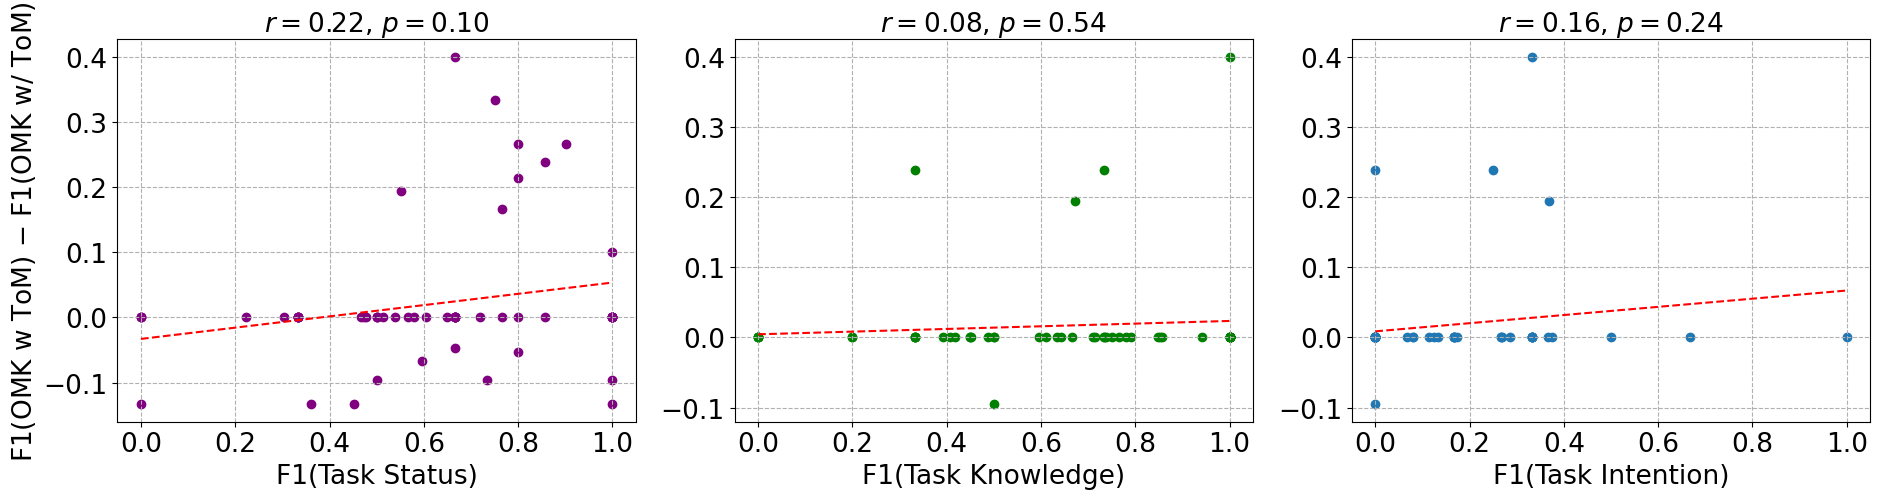

In [18]:
fontsize = 19

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(19, 5.1))

# Plot for Task Intention
axes[2].scatter(tom8_common_f1, exp2_common_f1_diff_6_0)
axes[2].set_title(f'$r={tom8correlation_coefficient:.2f}$, $p={tom8p_value:.2f}$', fontsize=fontsize)
axes[2].plot(np.unique(tom8_common_f1), np.poly1d(np.polyfit(tom8_common_f1, exp2_common_f1_diff_6_0, 1))(np.unique(tom8_common_f1)), color='red', linestyle='--')
axes[2].set_xlabel('F1(Task Intention)', fontsize=fontsize)
#axes[2].set_ylabel('F1(OMK w ToM) - F1(OMK w/ ToM)', fontsize=fontsize)
#axes[2].legend(fontsize=fontsize, loc='upper center', bbox_to_anchor=(0.5, 1.17))
axes[2].grid(True, linestyle='--')
axes[2].tick_params(axis='both', labelsize=fontsize)

# Plot for Task Status
axes[0].scatter(tom6_common_f1, exp2_common_f1_diff_5_0, c='purple')
axes[0].set_title(f'$r={tom6correlation_coefficient:.2f}$, $p={tom6p_value:.2f}$', fontsize=fontsize)
axes[0].plot(np.unique(tom6_common_f1), np.poly1d(np.polyfit(tom6_common_f1, exp2_common_f1_diff_5_0, 1))(np.unique(tom6_common_f1)), color='red', linestyle='--')
axes[0].set_xlabel('F1(Task Status)', fontsize=fontsize)
axes[0].set_ylabel('F1(OMK w ToM) $-$ F1(OMK w/ ToM)', fontsize=fontsize)
#axes[0].legend(fontsize=fontsize, loc='upper center', bbox_to_anchor=(0.5, 1.17))
axes[0].grid(True, linestyle='--')
axes[0].tick_params(axis='both', labelsize=fontsize)

# Plot for Task Knowledge
axes[1].scatter(tom7_common_f1, exp2_common_f1_diff_6_0, c='green')
axes[1].set_title(f'$r={tom7correlation_coefficient:.2f}$, $p={tom7p_value:.2f}$', fontsize=fontsize)
axes[1].plot(np.unique(tom7_common_f1), np.poly1d(np.polyfit(tom7_common_f1, exp2_common_f1_diff_6_0, 1))(np.unique(tom7_common_f1)), color='red', linestyle='--')
axes[1].set_xlabel('F1(Task Knowledge)', fontsize=fontsize)
#axes[1].set_ylabel('F1(OMK w ToM) - F1(OMK w/ ToM)', fontsize=fontsize)
#axes[1].legend(fontsize=fontsize, loc='upper center', bbox_to_anchor=(0.5, 1.25))
axes[1].grid(True, linestyle='--')
axes[1].tick_params(axis='both', labelsize=fontsize)

plt.tight_layout()

plt.savefig('correlation_tom_feats_exp2.pdf', bbox_inches='tight')

plt.show()


### Partner's missing knowledge (exp3)

In [19]:
tom6correlation_coefficient, tom6p_value = pearsonr(tom6_common_f1, exp3_common_f1_diff_7_0)
tom7correlation_coefficient, tom7p_value = pearsonr(tom7_common_f1, exp3_common_f1_diff_7_0)
tom8correlation_coefficient, tom8p_value = pearsonr(tom8_common_f1, exp3_common_f1_diff_7_0)

In [20]:
print(tom6correlation_coefficient, tom6p_value)
print(tom7correlation_coefficient, tom7p_value)
print(tom8correlation_coefficient, tom8p_value)

0.23820019887745394 0.07176536455128052
-0.0691280537719391 0.6061193964113574
0.10181632005409125 0.4469499039738408


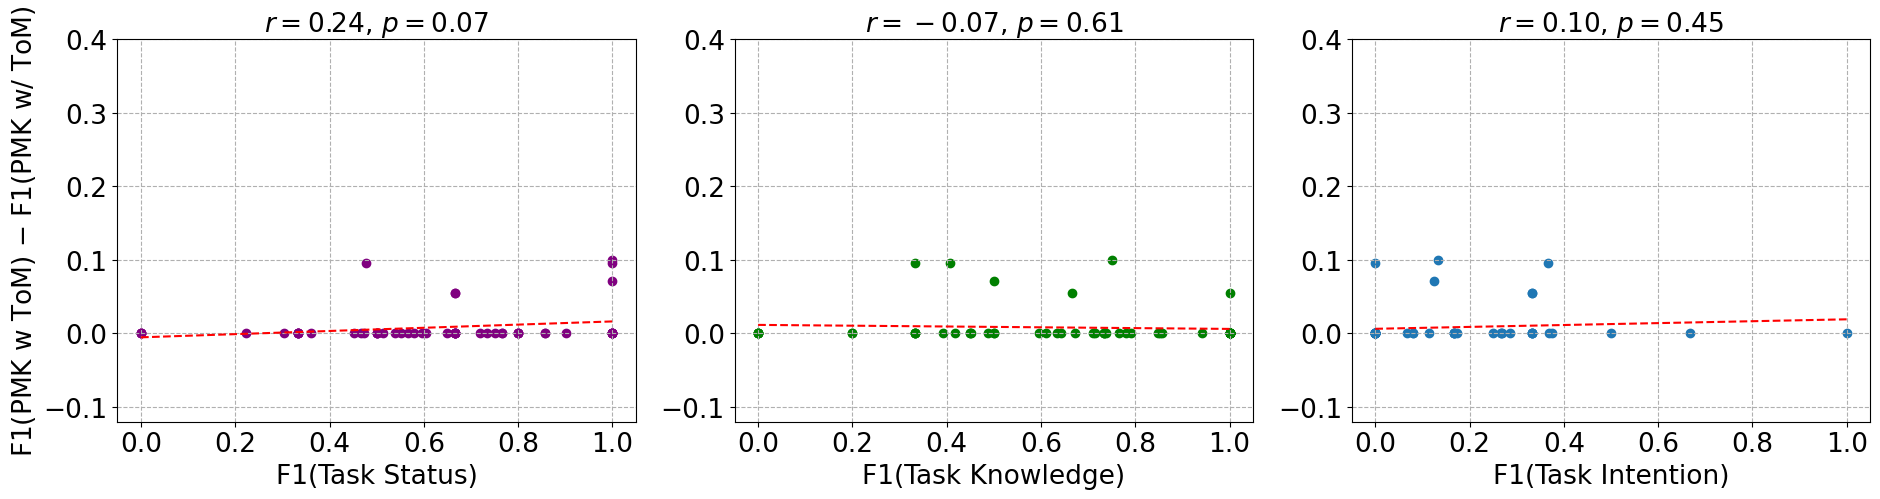

In [21]:

fontsize = 19
t_ylim = 0.4
b_ylim = -0.12

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(19, 5.1))

# Plot for Task Intention
axes[2].scatter(tom8_common_f1, exp3_common_f1_diff_7_0)
axes[2].set_title(f'$r={tom8correlation_coefficient:.2f}$, $p={tom8p_value:.2f}$', fontsize=fontsize)
axes[2].plot(np.unique(tom8_common_f1), np.poly1d(np.polyfit(tom8_common_f1, exp3_common_f1_diff_7_0, 1))(np.unique(tom8_common_f1)), color='red', linestyle='--')
axes[2].set_xlabel('F1(Task Intention)', fontsize=fontsize)
axes[2].set_ylim(b_ylim, t_ylim)
#axes[2].set_ylabel('F1(OMK w ToM) - F1(OMK w/ ToM)', fontsize=fontsize)
#axes[2].legend(fontsize=fontsize, loc='upper center', bbox_to_anchor=(0.5, 1.17))
axes[2].grid(True, linestyle='--')
axes[2].tick_params(axis='both', labelsize=fontsize)

# Plot for Task Status
axes[0].scatter(tom6_common_f1, exp3_common_f1_diff_7_0, c='purple')
axes[0].set_title(f'$r={tom6correlation_coefficient:.2f}$, $p={tom6p_value:.2f}$', fontsize=fontsize)
axes[0].plot(np.unique(tom6_common_f1), np.poly1d(np.polyfit(tom6_common_f1, exp3_common_f1_diff_7_0, 1))(np.unique(tom6_common_f1)), color='red', linestyle='--')
axes[0].set_xlabel('F1(Task Status)', fontsize=fontsize)
axes[0].set_ylabel('F1(PMK w ToM) $-$ F1(PMK w/ ToM)', fontsize=fontsize)
axes[0].set_ylim(b_ylim, t_ylim)
#axes[0].legend(fontsize=fontsize, loc='upper center', bbox_to_anchor=(0.5, 1.17))
axes[0].grid(True, linestyle='--')
axes[0].tick_params(axis='both', labelsize=fontsize)

# Plot for Task Knowledge
axes[1].scatter(tom7_common_f1, exp3_common_f1_diff_7_0, c='green')
axes[1].set_title(f'$r={tom7correlation_coefficient:.2f}$, $p={tom7p_value:.2f}$', fontsize=fontsize)
axes[1].plot(np.unique(tom7_common_f1), np.poly1d(np.polyfit(tom7_common_f1, exp3_common_f1_diff_7_0, 1))(np.unique(tom7_common_f1)), color='red', linestyle='--')
axes[1].set_xlabel('F1(Task Knowledge)', fontsize=fontsize)
axes[1].set_ylim(b_ylim, t_ylim)
#axes[1].set_ylabel('F1(OMK w ToM) - F1(OMK w/ ToM)', fontsize=fontsize)
#axes[1].legend(fontsize=fontsize, loc='upper center', bbox_to_anchor=(0.5, 1.25))
axes[1].grid(True, linestyle='--')
axes[1].tick_params(axis='both', labelsize=fontsize)

plt.tight_layout()

plt.savefig('correlation_tom_feats_exp3.pdf', bbox_inches='tight')

plt.show()